In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
import warnings; warnings.simplefilter('ignore')

# Densité population

In [2]:
population = pd.read_csv("C:/Users/Dell/Desktop/Eval/demo_pjan_1_Data.csv", sep=",")

In [3]:
population.head()

,TIME,GEO,AGE,SEX,UNIT,Value,Flag and Footnotes
0,2008,Union européenne (composition actuelle),Total,Total,Nombre,500297033,b
1,2008,Union européenne (avant l'accession de la Croa...,Total,Total,Nombre,495985066,b
2,2008,Zone euro (19 pays),Total,Total,Nombre,333096775,b
3,2008,Zone euro (18 pays),Total,Total,Nombre,329884170,b
4,2008,Belgique,Total,Total,Nombre,10666866,NaN


In [4]:
superficie = pd.read_csv("C:/Users/Dell/Desktop/Eval/EuropeSuperficie.csv", sep=",")

In [5]:
superficie.head()

,États_membres,Superficie_(km2)
0,Bulgarie,110944
1,Roumanie,238391
2,Allemagne,357021
3,Autriche,83858
4,Belgique,30510


In [6]:
population.drop(['AGE', 'SEX', 'UNIT', 'Flag and Footnotes'], axis=1, inplace=True)

In [7]:
demo = superficie.merge(population, left_on='États_membres', right_on='GEO', how='outer')

In [8]:
demo.dtypes

États_membres        object
Superficie_(km2)    float64
TIME                float64
GEO                  object
Value                object
dtype: object

In [9]:
demo.dropna(axis=0,inplace=True)

In [10]:
demo["Value"] = demo.Value.dropna(axis=0)

In [11]:
demo = demo[demo.Value != ":"]

In [12]:
demo["Value"] = demo["Value"].astype(int)

In [13]:
demo["Densite"] = demo['Value'] / demo['Superficie_(km2)']

In [14]:
demo['Densite']

0       67.763935
1       67.305298
2       66.896506
3       66.424782
4       66.044347
5       65.659720
6       65.309318
7       64.917418
8       64.481035
9       64.013007
10      86.561405
11      85.742708
12      85.131918
13      84.730795
14      84.298468
15      83.979991
16      83.674765
17      83.353176
18      82.890352
19      82.403908
21      99.072110
22      99.394250
23      99.592680
24      99.873167
25     100.266176
26     100.787760
27     101.454673
28     102.374562
29     103.752427
30     104.615719
          ...    
222    110.063753
223    110.193490
224    110.357457
225    110.399140
226    110.642277
227    110.775637
228    110.880315
229    110.990869
230    111.091248
231    111.277367
232     99.257838
233    100.348689
234    101.070261
235    101.228904
236    101.490940
237    101.655113
238    101.766899
239    101.855231
240    101.920111
241    102.004394
242     20.408137
243     20.571306
244     20.758732
245     20.925163
246     21

In [15]:
demo

,États_membres,Superficie_(km2),TIME,GEO,Value,Densite
0,Bulgarie,110944.0,2008.0,Bulgarie,7518002,67.763935
1,Bulgarie,110944.0,2009.0,Bulgarie,7467119,67.305298
2,Bulgarie,110944.0,2010.0,Bulgarie,7421766,66.896506
3,Bulgarie,110944.0,2011.0,Bulgarie,7369431,66.424782
4,Bulgarie,110944.0,2012.0,Bulgarie,7327224,66.044347
5,Bulgarie,110944.0,2013.0,Bulgarie,7284552,65.659720
6,Bulgarie,110944.0,2014.0,Bulgarie,7245677,65.309318
7,Bulgarie,110944.0,2015.0,Bulgarie,7202198,64.917418
8,Bulgarie,110944.0,2016.0,Bulgarie,7153784,64.481035
9,Bulgarie,110944.0,2017.0,Bulgarie,7101859,64.013007


# Visualisation

# Question A

In [16]:
pays = demo.sort_values(by = 'Densite', ascending = False)

In [17]:
pays.dtypes

États_membres        object
Superficie_(km2)    float64
TIME                float64
GEO                  object
Value                 int32
Densite             float64
dtype: object

In [18]:
pays

,États_membres,Superficie_(km2),TIME,GEO,Value,Densite
180,Malte,316.0,2017.0,Malte,460297,1456.636076
179,Malte,316.0,2016.0,Malte,450415,1425.363924
178,Malte,316.0,2015.0,Malte,439691,1391.427215
177,Malte,316.0,2014.0,Malte,429424,1358.936709
176,Malte,316.0,2013.0,Malte,422509,1337.053797
175,Malte,316.0,2012.0,Malte,417546,1321.348101
174,Malte,316.0,2011.0,Malte,414989,1313.256329
173,Malte,316.0,2010.0,Malte,414027,1310.212025
172,Malte,316.0,2009.0,Malte,410926,1300.398734
171,Malte,316.0,2008.0,Malte,407832,1290.607595


In [19]:
pays['États_membres'].unique()

array(['Malte', 'Pays-Bas', 'Belgique', 'Royaume-Uni', 'Luxembourg',
       'Italie', 'Danemark', 'Pologne', 'France', 'Portugal', 'Slovaquie',
       'Hongrie', 'Autriche', 'Slovénie', 'Chypre', 'Espagne', 'Roumanie',
       'Grèce', 'Irlande', 'Bulgarie', 'Lituanie', 'Lettonie', 'Estonie',
       'Suède', 'Finlande'], dtype=object)

In [20]:
malte = pays[pays['États_membres'] == 'Malte']

In [21]:
paysbas = pays[pays['États_membres'] == 'Pays-Bas']

In [22]:
belgique = pays[pays['États_membres'] == 'Belgique']

In [23]:
royaumeuni = pays[pays['États_membres'] == 'Royaume-Uni']

In [24]:
luxembourg = pays[pays['États_membres'] == 'Luxembourg']

In [25]:
malte = pd.DataFrame(malte)

In [26]:
paysbas = pd.DataFrame(paysbas)

In [27]:
belgique = pd.DataFrame(belgique)

In [28]:
royaumeuni = pd.DataFrame(royaumeuni)

In [29]:
luxembourg = pd.DataFrame(luxembourg)

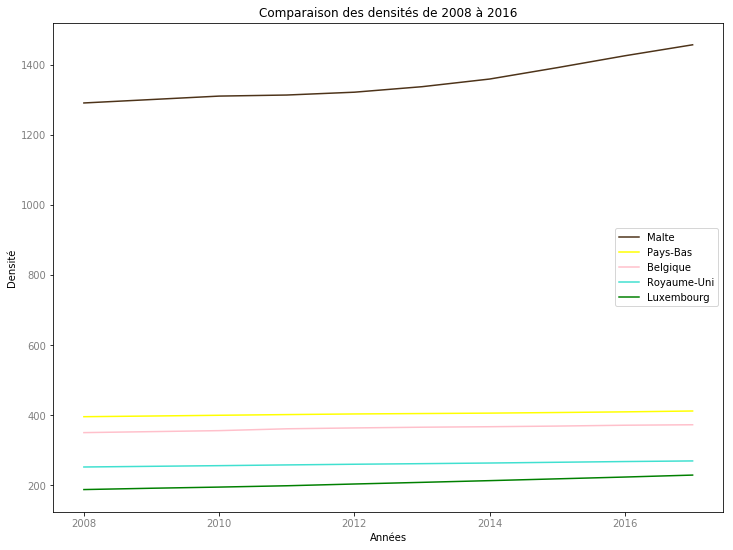

In [30]:
plt.figure(figsize=(12,9))
ax = plt.plot(malte.TIME,malte.Densite, color='#4d3319')
ax1 = plt.plot(paysbas.TIME,paysbas.Densite, color='yellow')
ax2 = plt.plot(belgique.TIME,belgique.Densite, color='pink')
ax3 = plt.plot(royaumeuni.TIME,royaumeuni.Densite, color='turquoise')
ax4 = plt.plot(luxembourg.TIME,luxembourg.Densite, color='green')
plt.ylabel("Densité",color='black')
plt.xlabel("Années", color='black')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.title("Comparaison des densités de 2008 à 2016", color='black')
plt.legend(('Malte','Pays-Bas', 'Belgique', 'Royaume-Uni', 'Luxembourg'),loc='center right')
plt.show()

# Criminalité

# Question B

In [31]:
infraction = pd.read_csv("crim_gen_1_Data.csv", sep=",")

In [32]:
infraction.drop(columns="Flag and Footnotes", inplace = True)
infraction.dropna(axis=0,inplace=True)

In [33]:
infraction.head()

,TIME,GEO,UNIT,ICCS,Value
5,1998,Bulgarie,Nombre,Total,163988.0
6,1998,Bulgarie,Nombre,Homicide intentionnel,381.0
8,1998,Bulgarie,Nombre,Vol qualifié,4494.0
9,1998,Bulgarie,Nombre,Cambriolage de locaux résidentiels privés,4383.0
10,1998,Tchéquie,Nombre,Total,42593.0


In [34]:
inf2 = infraction[infraction['TIME'] == 2007]

In [35]:
inf2.groupby(['ICCS']).head()
h = pd.DataFrame(inf2[inf2["ICCS"]== "Homicide intentionnel"].sum())
h.drop(['TIME', 'GEO', 'UNIT', 'ICCS'], inplace=True)
inf2.groupby(['ICCS']).head()
a = pd.DataFrame(inf2[inf2["ICCS"]== "Actes portant atteinte ou visant à porter atteinte à la personne, actes préjudiciables à caractère sexuel et actes visant des biens avec violence ou menaces contre une personne"].sum())
a.drop(['TIME', 'GEO', 'UNIT', 'ICCS'], inplace=True)
inf2.groupby(['ICCS']).head()
v = pd.DataFrame(inf2[inf2["ICCS"]== "Vol qualifié"].sum())
v.drop(['TIME', 'GEO', 'UNIT', 'ICCS'], inplace=True)
inf2.groupby(['ICCS']).head()
c = pd.DataFrame(inf2[inf2["ICCS"]== "Cambriolage de locaux résidentiels privés"].sum())
c.drop(['TIME', 'GEO', 'UNIT', 'ICCS'], inplace=True)

In [36]:
h.rename(columns={0:'Value'})
h.rename({'Value':'Homicide'}, inplace=True, axis='index')
a.rename(columns={0:'Value'})
a.rename({'Value':'Actes Violents'}, inplace=True, axis='index')
v.rename(columns={0:'Value'})
v.rename({'Value':'Vol qualifié'}, inplace=True, axis='index')
c.rename(columns={0:'Value'})
c.rename({'Value':'Cambriolage'}, inplace=True, axis='index')

In [37]:
all1 = pd.concat([h, a])
all2 = pd.concat([v, c])
all3 = pd.concat([all1, all2])
all3.rename(columns={0:'Value'})

,Value
Homicide,8298
Actes Violents,2.82594e+06
Vol qualifié,621688
Cambriolage,1.2669e+06


In [38]:
plot = all3.plot.pie(subplots=True, colors = ['#5d5d5a', '#ffcdab', '#fff4e3', '#ffa45c'], explode = [0.03,0.03,0.03,0.03], autopct = "%1.1f%%",figsize=(9, 9) )

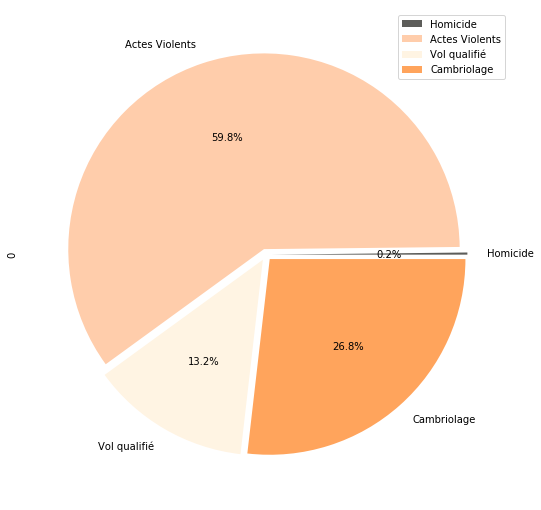

In [39]:
plt.show()

# Police

In [40]:
police = pd.read_csv("C:/Users/Dell/Desktop/Eval/crim_plce_1_Data.csv", sep=",")

In [41]:
police.drop(columns="Flag and Footnotes",inplace=True)
police.dropna(axis=0,inplace=True)
police.Value = police.Value.astype(int)

In [42]:
police.head()

,TIME,GEO,UNIT,Value
0,1998,Belgique,Nombre,36419
1,1998,Tchéquie,Nombre,43888
2,1998,Danemark,Nombre,9962
3,1998,"Allemagne (jusqu'en 1990, ancien territoire de...",Nombre,237786
4,1998,Estonie,Nombre,4089


In [43]:
police.dtypes

TIME      int64
GEO      object
UNIT     object
Value     int32
dtype: object

In [44]:
police["Value"] = police.Value.dropna(axis=0)

In [45]:
pol = police.merge(population, left_on='GEO', right_on='GEO', how='outer')

In [46]:
pol

,TIME_x,GEO,UNIT,Value_x,TIME_y,Value_y
0,1998.0,Belgique,Nombre,36419.0,2008.0,10666866
1,1998.0,Belgique,Nombre,36419.0,2009.0,10753080
2,1998.0,Belgique,Nombre,36419.0,2010.0,10839905
3,1998.0,Belgique,Nombre,36419.0,2011.0,11000638
4,1998.0,Belgique,Nombre,36419.0,2012.0,11075889
5,1998.0,Belgique,Nombre,36419.0,2013.0,11137974
6,1998.0,Belgique,Nombre,36419.0,2014.0,11180840
7,1998.0,Belgique,Nombre,36419.0,2015.0,11237274
8,1998.0,Belgique,Nombre,36419.0,2016.0,11311117
9,1998.0,Belgique,Nombre,36419.0,2017.0,11351727


In [47]:
pol.dtypes

TIME_x     float64
GEO         object
UNIT        object
Value_x    float64
TIME_y     float64
Value_y     object
dtype: object

In [48]:
pol = pol[pol.Value_y != ":"]

In [49]:
pol

,TIME_x,GEO,UNIT,Value_x,TIME_y,Value_y
0,1998.0,Belgique,Nombre,36419.0,2008.0,10666866
1,1998.0,Belgique,Nombre,36419.0,2009.0,10753080
2,1998.0,Belgique,Nombre,36419.0,2010.0,10839905
3,1998.0,Belgique,Nombre,36419.0,2011.0,11000638
4,1998.0,Belgique,Nombre,36419.0,2012.0,11075889
5,1998.0,Belgique,Nombre,36419.0,2013.0,11137974
6,1998.0,Belgique,Nombre,36419.0,2014.0,11180840
7,1998.0,Belgique,Nombre,36419.0,2015.0,11237274
8,1998.0,Belgique,Nombre,36419.0,2016.0,11311117
9,1998.0,Belgique,Nombre,36419.0,2017.0,11351727


In [50]:
pol.dropna(axis=0, inplace=True)

In [51]:
pol

,TIME_x,GEO,UNIT,Value_x,TIME_y,Value_y
0,1998.0,Belgique,Nombre,36419.0,2008.0,10666866
1,1998.0,Belgique,Nombre,36419.0,2009.0,10753080
2,1998.0,Belgique,Nombre,36419.0,2010.0,10839905
3,1998.0,Belgique,Nombre,36419.0,2011.0,11000638
4,1998.0,Belgique,Nombre,36419.0,2012.0,11075889
5,1998.0,Belgique,Nombre,36419.0,2013.0,11137974
6,1998.0,Belgique,Nombre,36419.0,2014.0,11180840
7,1998.0,Belgique,Nombre,36419.0,2015.0,11237274
8,1998.0,Belgique,Nombre,36419.0,2016.0,11311117
9,1998.0,Belgique,Nombre,36419.0,2017.0,11351727


# Visualisation

# Question C

In [52]:
police

,TIME,GEO,UNIT,Value
0,1998,Belgique,Nombre,36419
1,1998,Tchéquie,Nombre,43888
2,1998,Danemark,Nombre,9962
3,1998,"Allemagne (jusqu'en 1990, ancien territoire de...",Nombre,237786
4,1998,Estonie,Nombre,4089
5,1998,Irlande,Nombre,11235
6,1998,Grèce,Nombre,45389
8,1998,France,Nombre,223582
9,1998,France (métropolitaine),Nombre,223582
10,1998,Croatie,Nombre,22577


In [53]:
police.drop(['UNIT'], axis = 1, inplace = True)

In [54]:
policiers = police.sort_values(by = 'Value', ascending = False).head(10)

In [55]:
policiers = policiers.sort_values(by = 'TIME', ascending=True)

In [56]:
policiers

,TIME,GEO,Value
35,1998,Turquie,322766
71,1999,Turquie,345033
107,2000,Turquie,347806
143,2001,Turquie,368942
179,2002,Turquie,370095
215,2003,Turquie,318189
251,2004,Turquie,327371
287,2005,Turquie,330310
323,2006,Turquie,325738
359,2007,Turquie,329533


In [57]:
policiers.head(10)

,TIME,GEO,Value
35,1998,Turquie,322766
71,1999,Turquie,345033
107,2000,Turquie,347806
143,2001,Turquie,368942
179,2002,Turquie,370095
215,2003,Turquie,318189
251,2004,Turquie,327371
287,2005,Turquie,330310
323,2006,Turquie,325738
359,2007,Turquie,329533


In [58]:
turquie = policiers[policiers['GEO'] == 'Turquie']

In [59]:
turquie = turquie.sort_values(by='TIME', ascending=True)

In [60]:
turquie

,TIME,GEO,Value
35,1998,Turquie,322766
71,1999,Turquie,345033
107,2000,Turquie,347806
143,2001,Turquie,368942
179,2002,Turquie,370095
215,2003,Turquie,318189
251,2004,Turquie,327371
287,2005,Turquie,330310
323,2006,Turquie,325738
359,2007,Turquie,329533


In [61]:
t = turquie.reset_index(inplace = True)

In [62]:
t

In [63]:
inf2 = infraction[infraction['GEO'] == 'Turquie']

In [64]:
inf2 = inf2.drop(inf2[inf2['ICCS'] == 'Total'].index)

In [65]:
inf3 = inf2.groupby(['GEO','TIME'])['Value'].sum()

In [66]:
inf4 = pd.DataFrame(inf3)

In [67]:
inf4.reset_index(inplace=True)

In [68]:
inf4

,GEO,TIME,Value
0,Turquie,1998,79708.0
1,Turquie,1999,77956.0
2,Turquie,2000,106031.0
3,Turquie,2001,124838.0
4,Turquie,2002,47978.0
5,Turquie,2003,138260.0
6,Turquie,2004,160999.0
7,Turquie,2005,203555.0
8,Turquie,2006,200406.0
9,Turquie,2007,225269.0


In [69]:
inf4.columns

Index(['GEO', 'TIME', 'Value'], dtype='object')

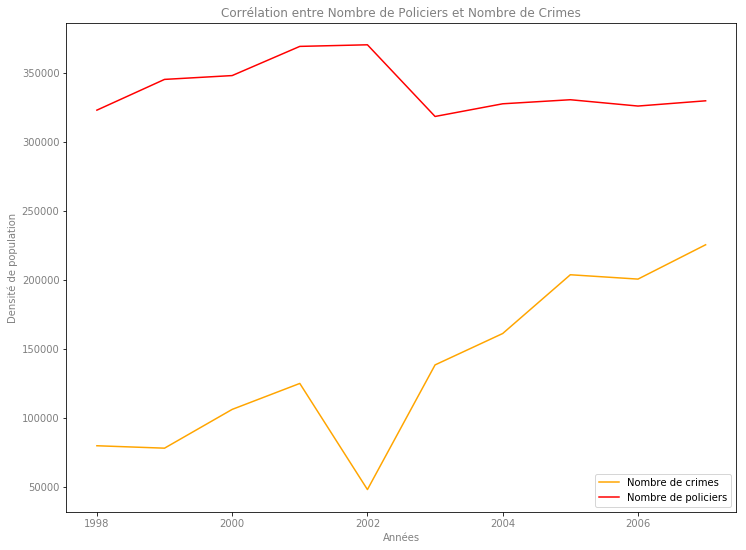

In [70]:
plt.figure(figsize=(12,9))
ax = plt.plot(inf4.TIME,inf4.Value, color='orange')
ax1 = plt.plot(policiers.TIME,policiers.Value, color='red')
plt.ylabel("Densité de population",color='grey')
plt.xlabel("Années", color='grey')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.title("Corrélation entre Nombre de Policiers et Nombre de Crimes", color='grey')
plt.legend(('Nombre de crimes', 'Nombre de policiers'),loc='lower right')
plt.show()

# Population carcérale

# Question D

In [71]:
prisonniers = pd.read_csv("C:/Users/Dell/Desktop/Eval/crim_pris_pop_1_Data.csv", sep=",")

In [72]:
prisonniers.head()

,TIME,GEO,UNIT,Value
1998,Belgique,Nombre,8176.0,NaN
1998,Bulgarie,Nombre,10779.0,NaN
1998,Tchéquie,Nombre,22085.0,NaN
1998,Danemark,Nombre,3422.0,NaN
1998,"Allemagne (jusqu'en 1990, ancien territoire de...",Nombre,69917.0,NaN


In [73]:
prisonniers.reset_index(inplace=True)
prisonniers.rename(columns={"index":"TIME","TIME":"GEO","GEO":"UNIT","UNIT":"Value","Value":"Drop"},inplace=True)
prisonniers.drop(columns=["Drop"],inplace = True)
prisonniers.dropna(axis=0,inplace=True)
prifr = prisonniers[prisonniers["GEO"] == "France"]

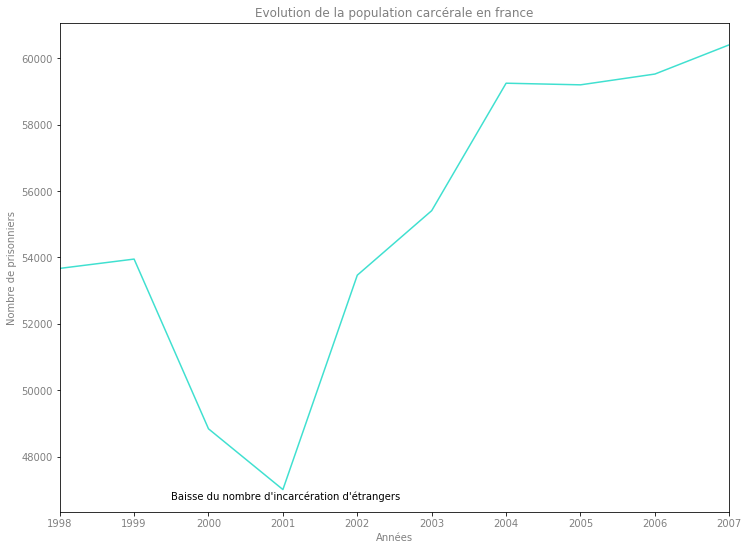

In [74]:
plt.figure(figsize=(12,9))
ax = plt.plot(prifr.TIME,prifr.Value, color='turquoise')
plt.ylabel("Nombre de prisonniers",color='grey')
plt.xlabel("Années", color='grey')
plt.xticks(color='grey')
plt.yticks(color='grey')
plt.title("Evolution de la population carcérale en france", color='grey')
plt.axis([1998,2007, None, None])
plt.annotate("Baisse du nombre d'incarcération d'étrangers",xy=(1999.5,46700))
plt.show()

# Bonus

In [75]:
import folium as fl

# Corrélations

# Nombre de policiers et criminalité

In [76]:
from sklearn.linear_model import LinearRegression

In [77]:
infraction = infraction[infraction["ICCS"] != "Total"]
infcor = infraction.drop(columns="ICCS")
infcore = pd.DataFrame(infcor.groupby(["GEO","TIME"])["Value"].sum()).reset_index()

core = police.merge(infcore, left_on=['GEO',"TIME"], right_on=['GEO',"TIME"], how='inner')
core.dropna(axis=0, inplace=True)
core.rename(columns={"Value_x":"Policiers","Value_y":"Crimes"},inplace=True)

plot = sns.regplot(core.Policiers,core.Crimes)


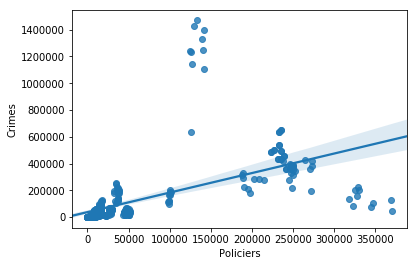

In [78]:
plt.show()

# Prédiction

In [79]:
X = core [['Policiers']]
Y = core [['Crimes']]
lr = LinearRegression()

In [80]:
lr.fit(X,Y)
lr.coef_

array([[1.45798077]])

In [81]:
lr.intercept_

array([37581.32237543])

In [82]:
np = lr.predict(X)
np

array([[101569.18243206],
       [ 52105.72681136],
       [384268.73787455],
       [ 43543.00574609],
       [ 53961.73633223],
       [103757.61156861],
       [363559.57901007],
       [363559.57901007],
       [ 70498.15423148],
       [424081.81877517],
       [ 43394.2917075 ],
       [ 53441.23719716],
       [ 58256.94768219],
       [ 39237.58853074],
       [ 81877.6941454 ],
       [ 40141.53660847],
       [ 84365.00933991],
       [ 76679.99269849],
       [182336.94317661],
       [104800.06781953],
       [108735.15791917],
       [ 47526.20921115],
       [ 57975.55739348],
       [ 49083.33267407],
       [ 61534.48845432],
       [222473.69580829],
       [ 59238.16874075],
       [ 48347.05238496],
       [ 58528.13210551],
       [508167.94375343],
       [101853.48868231],
       [ 52231.11315763],
       [405327.81212395],
       [ 42806.72545698],
       [ 54286.86604406],
       [108994.67849632],
       [310879.8178096 ],
       [368722.28891848],
       [3687

In [83]:
core.corr()

,TIME,Policiers,Crimes
TIME,1.000000,-0.010074,-0.007783
Policiers,-0.010074,1.000000,0.564332
Crimes,-0.007783,0.564332,1.000000


In [84]:
lr.score(X,Y)

0.3184706250527858

# Corrélations Criminalité, nombre de policiers et nombre de détenus

In [85]:
core = core.merge(prisonniers, left_on='GEO', right_on='GEO', how='outer')
core

,TIME_x,GEO,Policiers,Crimes,TIME_y,UNIT,Value
0,1998.0,Tchéquie,43888.0,19622.0,1998.0,Nombre,22085.0
1,1998.0,Tchéquie,43888.0,19622.0,1999.0,Nombre,23395.0
2,1998.0,Tchéquie,43888.0,19622.0,2000.0,Nombre,22418.0
3,1998.0,Tchéquie,43888.0,19622.0,2001.0,Nombre,20971.0
4,1998.0,Tchéquie,43888.0,19622.0,2002.0,Nombre,16597.0
5,1998.0,Tchéquie,43888.0,19622.0,2003.0,Nombre,17180.0
6,1998.0,Tchéquie,43888.0,19622.0,2004.0,Nombre,18303.0
7,1998.0,Tchéquie,43888.0,19622.0,2005.0,Nombre,19003.0
8,1998.0,Tchéquie,43888.0,19622.0,2006.0,Nombre,18904.0
9,1998.0,Tchéquie,43888.0,19622.0,2007.0,Nombre,19110.0


In [86]:
core.dropna(axis=0,inplace=True)
core.rename(columns={"TIME_x":"Annee","UNIT_x":"UNIT","Value":"Detenus"},inplace=True)
core.drop(columns=["TIME_y"],inplace=True)

In [87]:
core.head()

,Annee,GEO,Policiers,Crimes,UNIT,Detenus
0,1998.0,Tchéquie,43888.0,19622.0,Nombre,22085.0
1,1998.0,Tchéquie,43888.0,19622.0,Nombre,23395.0
2,1998.0,Tchéquie,43888.0,19622.0,Nombre,22418.0
3,1998.0,Tchéquie,43888.0,19622.0,Nombre,20971.0
4,1998.0,Tchéquie,43888.0,19622.0,Nombre,16597.0


# Prédictions

In [88]:
X = core [['Policiers', 'Detenus']]
Y = core [['Crimes']]
lr = LinearRegression()

In [89]:
lr.fit(X,Y)
lr.coef_

array([[-0.29003397,  7.0117202 ]])

In [90]:
lr.intercept_

array([3338.73655183])

In [91]:
npc = lr.predict(X)
npc

array([[145463.56628079],
       [154648.91974224],
       [147798.46910725],
       ...,
       [  3975.03805402],
       [  3975.03805402],
       [  3946.99117322]])

In [92]:
core.corr()

,Annee,Policiers,Crimes,Detenus
Annee,1.000000,-0.008385,-0.001637,-0.017500
Policiers,-0.008385,1.000000,0.524366,0.842470
Crimes,-0.001637,0.524366,1.000000,0.660519
Detenus,-0.017500,0.842470,0.660519,1.000000


In [93]:
lr.score(X,Y)

0.43983514452916667

# Corrélations dépenses de santé et criminalité

In [94]:
sante = pd.read_csv("C:/Users/Dell/Desktop/Eval/spr_exp_sum_1_Data.csv", sep=",")

In [95]:
sante.dropna(axis = 0, inplace = True)

In [96]:
sante

,TIME,GEO,SPDEPS,UNIT,Value,Flag and Footnotes
25,2007,Union européenne (avant l'accession de la Croa...,Total des dépenses,Millions d'euros,"3276283,09",p
27,2007,Union européenne (avant l'accession de la Croa...,Total des dépenses,Euro par habitant,"6618,83",p
30,2007,Union européenne (avant l'accession de la Croa...,Prestations de protection sociale,Millions d'euros,"3135727,18",p
32,2007,Union européenne (avant l'accession de la Croa...,Prestations de protection sociale,Euro par habitant,"6334,88",p
35,2007,Union européenne (avant l'accession de la Croa...,Dépenses de fonctionnement,Millions d'euros,"100153,36",p
37,2007,Union européenne (avant l'accession de la Croa...,Dépenses de fonctionnement,Euro par habitant,"202,33",p
40,2007,Union européenne (avant l'accession de la Croa...,Autres dépenses,Millions d'euros,"40402,55",p
42,2007,Union européenne (avant l'accession de la Croa...,Autres dépenses,Euro par habitant,"81,62",p
45,2007,Union européenne (avant l'accession de la Croa...,Maladie/Soins de santé,Millions d'euros,"912145,20",p
47,2007,Union européenne (avant l'accession de la Croa...,Maladie/Soins de santé,Euro par habitant,"1842,74",p


In [97]:
sante = sante[sante["SPDEPS"] == "Maladie/Soins de santé"]
sante = sante[sante["UNIT"] == "Millions d'euros"]
sante.drop(columns=['Flag and Footnotes', 'SPDEPS'], inplace=True)
sante.drop(columns=['UNIT'], inplace=True)

sante["Value"] = sante["Value"].str.replace(",",".")
sante["Value"] = sante["Value"].astype(float)

In [98]:
sante

,TIME,GEO,Value
45,2007,Union européenne (avant l'accession de la Croa...,912145.20
70,2007,Union européenne (15 pays),872331.22
95,2007,Zone euro (19 pays),681292.66
120,2007,Zone euro (18 pays),680049.27
145,2007,Zone euro (12 pays),672716.37
245,2007,Danemark,14104.01
345,2007,Grèce,13475.43
670,2007,Pologne,12231.01
995,2008,Union européenne (composition actuelle),950710.93
1020,2008,Union européenne (avant l'accession de la Croa...,947731.61


In [99]:
core.head()

,Annee,GEO,Policiers,Crimes,UNIT,Detenus
0,1998.0,Tchéquie,43888.0,19622.0,Nombre,22085.0
1,1998.0,Tchéquie,43888.0,19622.0,Nombre,23395.0
2,1998.0,Tchéquie,43888.0,19622.0,Nombre,22418.0
3,1998.0,Tchéquie,43888.0,19622.0,Nombre,20971.0
4,1998.0,Tchéquie,43888.0,19622.0,Nombre,16597.0


In [102]:
test = infraction.merge(sante, left_on=['GEO',"TIME"], right_on=['GEO',"TIME"], how='outer')
test.dropna(axis=0,inplace=True)
test

,TIME,GEO,UNIT,ICCS,Value_x,Value_y
1334,2007,Danemark,Nombre,Homicide intentionnel,76.0,14104.01
1335,2007,Danemark,Nombre,Actes portant atteinte ou visant à porter atte...,20597.0,14104.01
1336,2007,Danemark,Nombre,Vol qualifié,5784.0,14104.01
1337,2007,Danemark,Nombre,Cambriolage de locaux résidentiels privés,36342.0,14104.01
1350,2007,Grèce,Nombre,Homicide intentionnel,128.0,13475.43
1351,2007,Grèce,Nombre,Actes portant atteinte ou visant à porter atte...,10851.0,13475.43
1352,2007,Grèce,Nombre,Vol qualifié,2823.0,13475.43
1353,2007,Grèce,Nombre,Cambriolage de locaux résidentiels privés,49886.0,13475.43
1406,2007,Pologne,Nombre,Homicide intentionnel,525.0,12231.01
1407,2007,Pologne,Nombre,Actes portant atteinte ou visant à porter atte...,54629.0,12231.01


In [103]:
test.corr()

,TIME,Value_x,Value_y
TIME,NaN,NaN,NaN
Value_x,NaN,1.000000,-0.304518
Value_y,NaN,-0.304518,1.000000


### à 0.3 il vaut mieux ne pas faire de prédiction...

# Criminalité et densité

### pas de possibilités de comparer ces 2 jeux de données car l'un termine en 2007 et l'autre débute en 2008...